In [1]:
#pip install lifelines

## Predictive Modeling of Employee Retention Using Survival Analysis

In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Darshan\Downloads\turnover.csv",encoding='latin1')
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,0,1,m,36.0,IT,IT,empjs,no,m,white,foot,3.8,7.6,2.6,7.9,4.4
1,0,1,f,24.0,IT,HR,youjs,yes,f,white,bus,8.6,4.1,4.9,3.3,6.0
2,0,0,f,29.0,Retail,HR,empjs,my head,f,grey,bus,4.6,5.5,1.8,7.1,6.7
3,0,0,f,29.0,Retail,HR,empjs,my head,f,grey,bus,4.6,1.0,5.7,8.7,2.9
4,0,0,f,29.0,Retail,HR,empjs,my head,f,grey,bus,5.4,4.8,8.0,9.4,2.9


### EDA

In [4]:
df.isna().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [5]:
df.shape

(1129, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   int64  
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(6), int64(2), object(8)
memory usage: 141.2+ KB


In [7]:
df.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.631532,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.108826,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,12.000000,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.000000,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.000000,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.000000,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
df.corr()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.048512,-0.197192,-0.088353,0.000814,0.077223,0.014643,-0.037793
event,-0.048512,1.000000,-0.048751,0.015458,0.051864,-0.040040,-0.063232,0.006825
age,-0.197192,-0.048751,1.000000,-0.149753,0.056129,0.038996,0.057782,0.039509
extraversion,-0.088353,0.015458,-0.149753,1.000000,-0.200052,-0.538039,-0.135046,0.297375
independ,0.000814,0.051864,0.056129,-0.200052,1.000000,-0.165795,-0.427209,0.023865
selfcontrol,0.077223,-0.040040,0.038996,-0.538039,-0.165795,1.000000,-0.107568,-0.565972
anxiety,0.014643,-0.063232,0.057782,-0.135046,-0.427209,-0.107568,1.000000,0.246668
novator,-0.037793,0.006825,0.039509,0.297375,0.023865,-0.565972,0.246668,1.000000


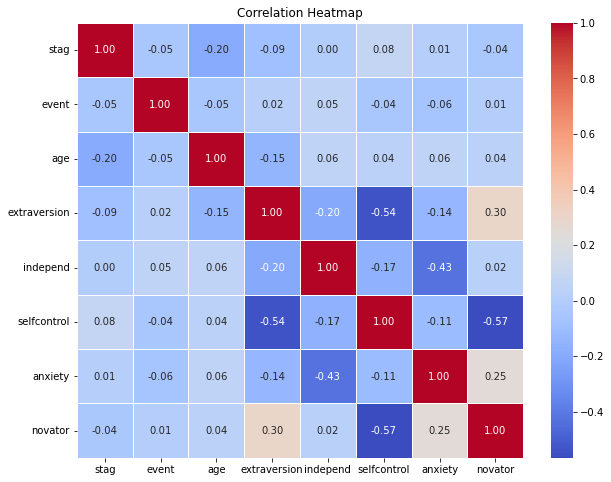

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
df.columns

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

### Visualizing Event Distribution with Count Plot

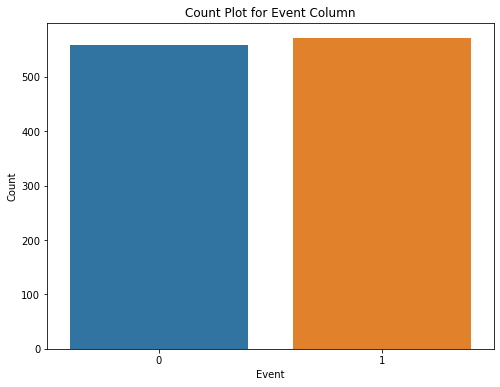

Event Counts:
1    571
0    558
Name: event, dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting count plot for the 'event' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='event')
plt.title('Count Plot for Event Column')
plt.xlabel('Event')
plt.ylabel('Count')
plt.show()
event_counts = df['event'].value_counts()
print("Event Counts:")
print(event_counts)


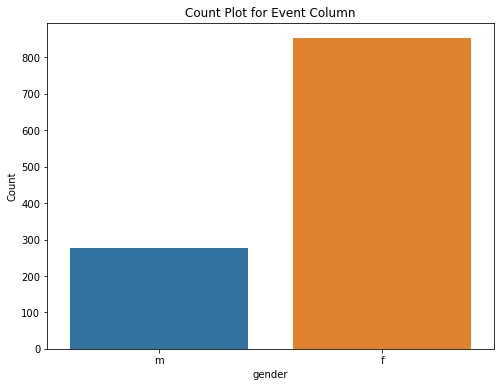

gender Counts:
f    853
m    276
Name: gender, dtype: int64


In [12]:
# Plotting count plot for the 'event' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Count Plot for Event Column')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()
gender_counts = df['gender'].value_counts()
print("gender Counts:")
print(gender_counts)

In [13]:
# Filter the DataFrame for females who churn (event=0)
female_churn_count = df[(df['gender'] == 'f') & (df['event'] == 0)].shape[0]
print("Number of female churn (event=0):", female_churn_count)
# Filter the DataFrame for males who churn (event=0)
male_churn_count = df[(df['gender'] == 'm') & (df['event'] == 0)].shape[0]
print("Number of male churn (event=0):", male_churn_count)


Number of female churn (event=0): 417
Number of male churn (event=0): 141


### Age distribution of churned

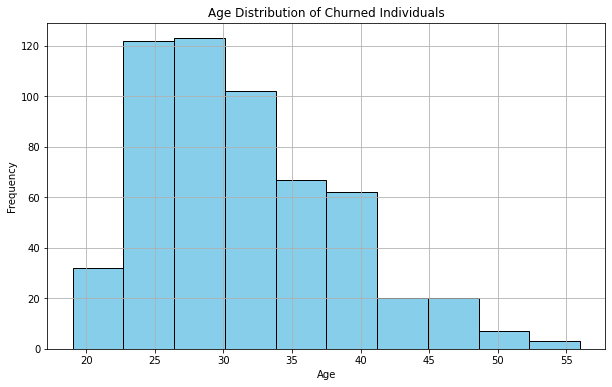

In [14]:
import matplotlib.pyplot as plt

# Filter the DataFrame for individuals who churned (event=0)
churned_df = df[df['event'] == 0]

# Plotting histogram for the age distribution of churned individuals
plt.figure(figsize=(10, 6))
plt.hist(churned_df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Churned Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Count of each event for each profession

Profession: Accounting, Event: 0, Count: 4
Profession: Accounting, Event: 1, Count: 6
Profession: BusinessDevelopment, Event: 0, Count: 11
Profession: BusinessDevelopment, Event: 1, Count: 16
Profession: Commercial, Event: 0, Count: 8
Profession: Commercial, Event: 1, Count: 15
Profession: Consult, Event: 0, Count: 9
Profession: Consult, Event: 1, Count: 16
Profession: Engineer, Event: 0, Count: 4
Profession: Engineer, Event: 1, Count: 11
Profession: Finanñe, Event: 0, Count: 5
Profession: Finanñe, Event: 1, Count: 12
Profession: HR, Event: 0, Count: 400
Profession: HR, Event: 1, Count: 357
Profession: IT, Event: 0, Count: 49
Profession: IT, Event: 1, Count: 25
Profession: Law, Event: 0, Count: 2
Profession: Law, Event: 1, Count: 5
Profession: Marketing, Event: 0, Count: 10
Profession: Marketing, Event: 1, Count: 21
Profession: PR, Event: 0, Count: 1
Profession: PR, Event: 1, Count: 5
Profession: Sales, Event: 0, Count: 31
Profession: Sales, Event: 1, Count: 35
Profession: Teaching, Ev

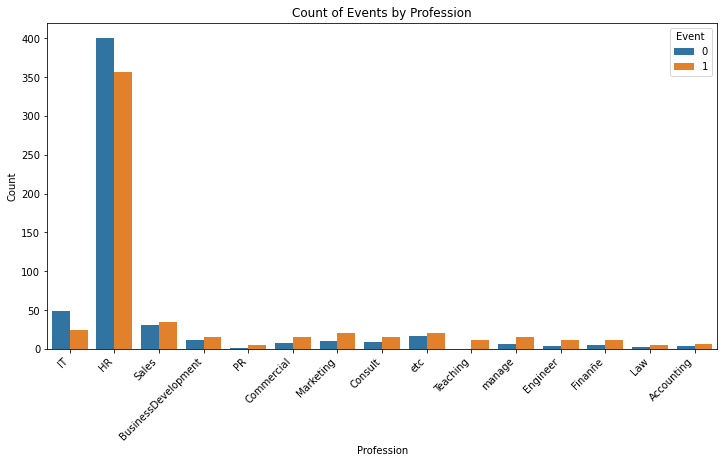

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the count of each event for each profession
event_profession_counts = df.groupby(['profession', 'event']).size().reset_index(name='count')

# Plotting count plot for profession and event
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='profession', hue='event')
plt.title('Count of Events by Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event')

# Printing the count for each event for each profession
for index, row in event_profession_counts.iterrows():
    print(f"Profession: {row['profession']}, Event: {row['event']}, Count: {row['count']}")

plt.show()


### Churned for each industry

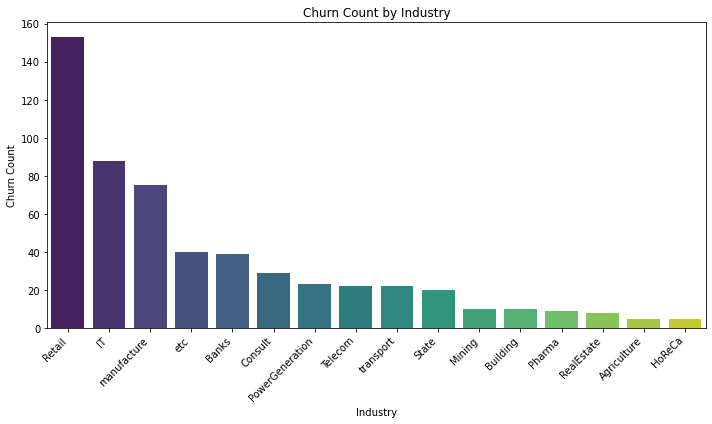

Industry with the most churn:
Industry: Retail
Churn Count: 153


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for churned individuals (event=0)
churned_df = df[df['event'] == 0]

# Calculate the count of churned individuals for each industry
industry_churn_count = churned_df['industry'].value_counts().reset_index()
industry_churn_count.columns = ['Industry', 'Churn Count']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=industry_churn_count, x='Industry', y='Churn Count', palette='viridis')
plt.title('Churn Count by Industry')
plt.xlabel('Industry')
plt.ylabel('Churn Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter the DataFrame for churned individuals (event=0)
churned_df = df[df['event'] == 0]

# Calculate the count of churned individuals for each industry
industry_churn_count = churned_df['industry'].value_counts()

# Print the industry with the highest churn count
most_churn_industry = industry_churn_count.idxmax()
most_churn_count = industry_churn_count.max()

print("Industry with the most churn:")
print("Industry:", most_churn_industry)
print("Churn Count:", most_churn_count)


### Event for each way of transportation

Way: bus, Event: 0, Count: 327
Way: bus, Event: 1, Count: 354
Way: car, Event: 0, Count: 157
Way: car, Event: 1, Count: 174
Way: foot, Event: 0, Count: 74
Way: foot, Event: 1, Count: 43


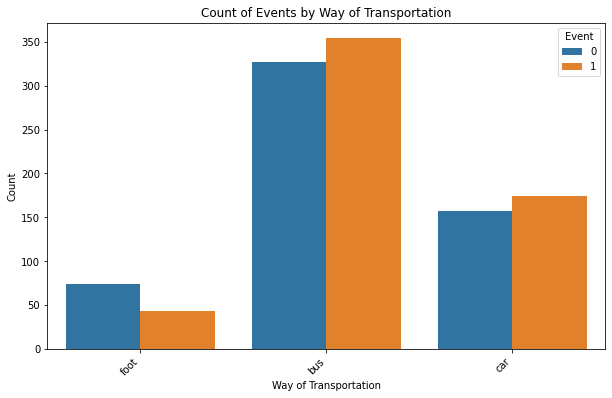

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the count of each event for each way of transportation
event_way_counts = df.groupby(['way', 'event']).size().reset_index(name='count')

# Plotting count plot for way and event
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='way', hue='event')
plt.title('Count of Events by Way of Transportation')
plt.xlabel('Way of Transportation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event')

# Printing the count for each event for each way of transportation
for index, row in event_way_counts.iterrows():
    print(f"Way: {row['way']}, Event: {row['event']}, Count: {row['count']}")

plt.show()


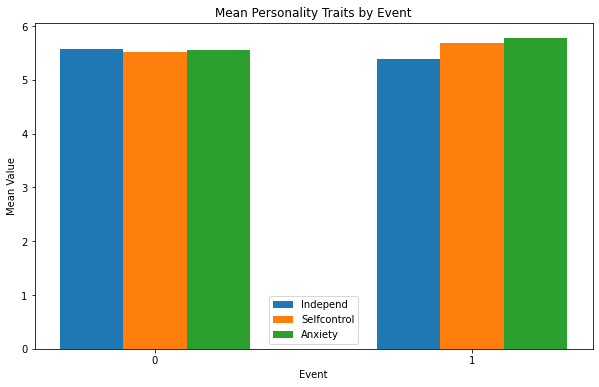

In [18]:
import matplotlib.pyplot as plt

# Grouped bar plot for personality traits and event
plt.figure(figsize=(10, 6))

# Plotting bars for each personality trait
bar_width = 0.2
index = df['event'].unique()
bar_index = [index - bar_width, index, index + bar_width]

plt.bar(bar_index[0], df.groupby('event')['independ'].mean(), bar_width, label='Independ')
plt.bar(bar_index[1], df.groupby('event')['selfcontrol'].mean(), bar_width, label='Selfcontrol')
plt.bar(bar_index[2], df.groupby('event')['anxiety'].mean(), bar_width, label='Anxiety')

plt.xlabel('Event')
plt.ylabel('Mean Value')
plt.title('Mean Personality Traits by Event')
plt.xticks(index, df['event'].unique())
plt.legend()
plt.show()


### head_gender and event

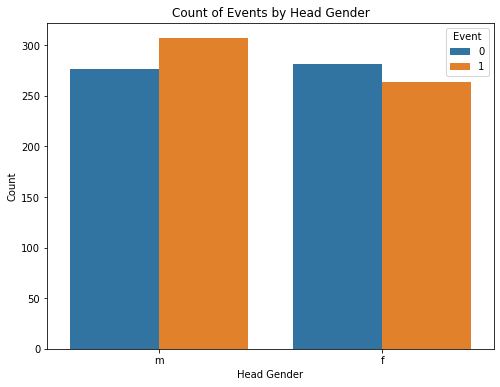

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting count plot for head_gender and event
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='head_gender', hue='event')
plt.title('Count of Events by Head Gender')
plt.xlabel('Head Gender')
plt.ylabel('Count')
plt.legend(title='Event')
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_cols = ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,0,1,1,36.0,5,7,2,1,1,1,2,3.8,7.6,2.6,7.9,4.4
1,0,1,0,24.0,5,6,7,2,0,1,0,8.6,4.1,4.9,3.3,6.0
2,0,0,0,29.0,10,6,2,0,0,0,0,4.6,5.5,1.8,7.1,6.7
3,0,0,0,29.0,10,6,2,0,0,0,0,4.6,1.0,5.7,8.7,2.9
4,0,0,0,29.0,10,6,2,0,0,0,0,5.4,4.8,8.0,9.4,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,164,1,1,19.0,14,6,6,1,1,1,1,4.6,5.5,6.4,7.9,6.0
1125,165,0,0,27.0,12,9,1,1,0,1,1,3.8,4.8,4.9,6.3,5.2
1126,166,1,1,30.0,2,5,4,0,1,1,1,3.8,4.8,9.5,4.0,2.1
1127,166,1,1,26.0,10,11,5,1,1,1,1,3.0,5.5,5.7,7.1,6.7


In [21]:
df.corr()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.048512,0.042478,-0.197192,0.071789,-0.051573,0.008289,-0.014372,-0.007217,0.120884,0.074464,-0.088353,0.000814,0.077223,0.014643,-0.037793
event,-0.048512,1.000000,-0.018917,-0.048751,-0.064898,0.033031,-0.015078,0.064296,0.041259,-0.049166,-0.067470,0.015458,0.051864,-0.040040,-0.063232,0.006825
gender,0.042478,-0.018917,1.000000,0.055559,-0.018343,0.069097,-0.027809,0.011848,0.211305,0.019874,0.063631,-0.146428,-0.124849,0.075138,0.319064,0.011070
age,-0.197192,-0.048751,0.055559,1.000000,0.094457,-0.120165,-0.112726,0.047159,0.197833,-0.028580,0.060681,-0.149753,0.056129,0.038996,0.057782,0.039509
industry,0.071789,-0.064898,-0.018343,0.094457,1.000000,0.038143,0.007050,-0.056557,0.002100,-0.042358,0.032720,-0.027950,-0.083249,0.084204,0.040872,-0.062133
profession,-0.051573,0.033031,0.069097,-0.120165,0.038143,1.000000,-0.061871,-0.017381,0.003221,-0.018734,0.065788,0.026550,0.007971,-0.069070,-0.029883,0.052465
traffic,0.008289,-0.015078,-0.027809,-0.112726,0.007050,-0.061871,1.000000,0.008135,-0.001959,0.025800,-0.067533,-0.057952,-0.049713,0.107039,-0.051959,-0.098425
coach,-0.014372,0.064296,0.011848,0.047159,-0.056557,-0.017381,0.008135,1.000000,0.020843,0.020890,0.008798,0.028686,-0.006078,-0.038380,-0.002010,0.065036
head_gender,-0.007217,0.041259,0.211305,0.197833,0.002100,0.003221,-0.001959,0.020843,1.000000,-0.029769,0.007186,-0.006274,-0.045154,-0.041462,0.042197,0.042840
greywage,0.120884,-0.049166,0.019874,-0.028580,-0.042358,-0.018734,0.025800,0.020890,-0.029769,1.000000,0.072780,-0.013582,0.099136,0.022168,-0.068037,0.011802


### Remove duplicates

In [22]:
# Find duplicates
duplicate_rows = df[df.duplicated()]

# Remove duplicates
df = df.drop_duplicates()

# Print duplicate rows (if any)
print("Duplicate Rows:")
print(duplicate_rows)

# Print the updated DataFrame
print("DataFrame after removing duplicates:")
df


Duplicate Rows:
      stag  event  gender   age  industry  profession  traffic  coach  \
12       1      1       0  54.0         7           6        4      1   
29       2      0       0  26.0         2          11        1      1   
30       2      0       0  26.0         2          11        1      1   
37       2      0       0  26.0         2          11        1      1   
38       2      0       0  26.0         2          11        1      1   
41       2      0       0  26.0         2          11        1      1   
42       2      0       0  26.0         2          11        1      1   
45       2      0       0  26.0         2          11        1      1   
46       2      0       0  26.0         2          11        1      1   
218      9      1       0  42.0        14           6        2      2   
246     10      1       0  25.0         4           6        7      0   
259     11      0       0  41.0         2           6        4      0   
298     12      1       1  30.0    

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,0,1,1,36.0,5,7,2,1,1,1,2,3.8,7.6,2.6,7.9,4.4
1,0,1,0,24.0,5,6,7,2,0,1,0,8.6,4.1,4.9,3.3,6.0
2,0,0,0,29.0,10,6,2,0,0,0,0,4.6,5.5,1.8,7.1,6.7
3,0,0,0,29.0,10,6,2,0,0,0,0,4.6,1.0,5.7,8.7,2.9
4,0,0,0,29.0,10,6,2,0,0,0,0,5.4,4.8,8.0,9.4,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,164,1,1,19.0,14,6,6,1,1,1,1,4.6,5.5,6.4,7.9,6.0
1125,165,0,0,27.0,12,9,1,1,0,1,1,3.8,4.8,4.9,6.3,5.2
1126,166,1,1,30.0,2,5,4,0,1,1,1,3.8,4.8,9.5,4.0,2.1
1127,166,1,1,26.0,10,11,5,1,1,1,1,3.0,5.5,5.7,7.1,6.7


In [23]:
df

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,0,1,1,36.0,5,7,2,1,1,1,2,3.8,7.6,2.6,7.9,4.4
1,0,1,0,24.0,5,6,7,2,0,1,0,8.6,4.1,4.9,3.3,6.0
2,0,0,0,29.0,10,6,2,0,0,0,0,4.6,5.5,1.8,7.1,6.7
3,0,0,0,29.0,10,6,2,0,0,0,0,4.6,1.0,5.7,8.7,2.9
4,0,0,0,29.0,10,6,2,0,0,0,0,5.4,4.8,8.0,9.4,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,164,1,1,19.0,14,6,6,1,1,1,1,4.6,5.5,6.4,7.9,6.0
1125,165,0,0,27.0,12,9,1,1,0,1,1,3.8,4.8,4.9,6.3,5.2
1126,166,1,1,30.0,2,5,4,0,1,1,1,3.8,4.8,9.5,4.0,2.1
1127,166,1,1,26.0,10,11,5,1,1,1,1,3.0,5.5,5.7,7.1,6.7


### Analyzing Employee Retention with Kaplan-Meier Survival Curve

**Key Points for Explanation**

**Introduction to Kaplan-Meier Model:** The Kaplan-Meier model is a non-parametric statistic used to estimate the survival function from lifetime data. In the context of employee retention, it helps in understanding how different factors influence the tenure of employees within an organization.

**Fitting the Model:** The KaplanMeierFitter class from the lifelines package is utilized to fit the model. The model requires two key pieces of information: the duration each subject (employee) has been observed for, and whether the 'event' (employee leaving the company) was observed.

**Data Preparation:** The durations argument is populated with the 'stag' column from the dataset, representing the tenure or stage of each employee. The event_observed argument uses the 'event' column, indicating whether the employee has left.

**Survival Curve Plotting:** Once the model is fitted with the data, a Kaplan-Meier survival curve is plotted to visualize the survival probability over time. This curve provides insights into the likelihood of an employee staying with the company over a certain period.

**Insights for HR Strategies:** Analyzing the Kaplan-Meier survival curve can help HR departments in devising strategies to improve employee retention by identifying critical time periods where the risk of leaving is higher and implementing targeted interventions.

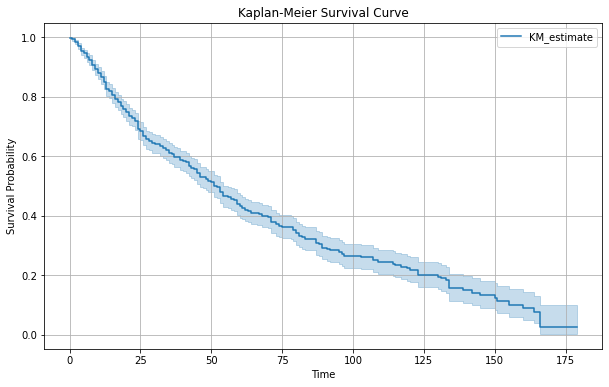

In [24]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Fit the Kaplan-Meier model
kmf = KaplanMeierFitter()
kmf.fit(durations=df['stag'], event_observed=df['event'])

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


In [25]:
# Median survival time
median_survival_time = kmf.median_survival_time_

# Survival probabilities at specific time points (e.g., at 1st, 5th, and 10th months )
time_points = [1, 5, 10]
survival_probabilities = kmf.predict(time_points)

# Print the results
print("Median Survival Time:", median_survival_time)
print("Survival Probabilities at Time Points:", dict(zip(time_points, survival_probabilities)))


Median Survival Time: 52.0
Survival Probabilities at Time Points: {1: 0.9936297128688578, 5: 0.9459128103987513, 10: 0.8814769533040446}


In [26]:
# Get unique values of 'stag' column (represents time in months)
unique_stag_values = df['stag'].unique()

# Calculate survival probabilities for each unique time point
survival_probabilities = kmf.predict(unique_stag_values)

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Time (Months)': unique_stag_values, 'Survival Probability': survival_probabilities})

# Print the DataFrame
result_df


,Time (Months),Survival Probability
0,0,0.998183
1,1,0.993630
2,2,0.985365
3,3,0.971395
4,4,0.954452
...,...,...
160,160,0.088775
164,164,0.076093
165,165,0.076093
166,166,0.025364


In [27]:
from lifelines.statistics import logrank_test

# Fit Kaplan-Meier model for group1
kmf_group1 = KaplanMeierFitter()
kmf_group1.fit(durations=df['stag'], event_observed=df['event'])

# Fit Kaplan-Meier model for group2
kmf_group2 = KaplanMeierFitter()
kmf_group2.fit(durations=df['stag'], event_observed=df['event'])

# Log-rank test for comparing survival curves between group1 and group2
result = logrank_test(df['stag'], df['stag'], event_observed_A=df['event'], event_observed_B=df['event'])
print("Log-rank test p-value:", result.p_value)


Log-rank test p-value: 1.0


In [28]:
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
train_df

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
569,25,0,0,29.0,10,6,7,1,0,1,1,9.4,1.2,4.1,5.6,6.7
303,12,0,0,38.0,4,6,7,0,0,1,0,2.2,8.4,7.2,3.3,5.2
2,0,0,0,29.0,10,6,2,0,0,0,0,4.6,5.5,1.8,7.1,6.7
6,1,0,0,24.0,6,6,7,1,0,1,0,4.6,7.6,7.2,2.5,3.7
602,27,1,1,30.0,10,11,7,1,1,1,1,7.0,4.8,1.8,8.7,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,21,1,0,40.0,3,6,4,0,1,1,1,2.2,8.4,6.4,4.8,6.7
130,6,0,0,23.0,10,6,7,0,0,1,0,4.6,6.9,5.7,4.8,9.0
1072,109,1,0,32.0,2,6,5,1,1,1,0,7.8,7.6,4.1,1.7,5.2
1123,164,0,1,23.0,10,6,2,1,0,1,1,5.4,7.6,5.7,7.1,6.0


In [30]:
test_df

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
343,14,0,0,56.0,10,6,2,1,1,1,0,4.6,6.2,4.9,5.6,6.7
707,37,1,0,37.0,13,6,7,2,0,1,0,6.2,6.2,6.4,5.6,5.2
429,18,1,0,41.0,2,6,2,1,1,1,0,7.8,5.5,2.6,6.3,8.3
745,41,0,1,33.0,10,6,2,1,0,1,1,4.6,6.2,8.0,7.1,5.2
255,11,0,0,28.0,1,6,3,1,0,1,0,6.2,5.5,3.3,6.3,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,83,1,0,23.0,2,6,4,2,0,1,1,6.2,9.1,4.1,3.3,6.7
946,67,0,1,31.0,2,13,3,1,1,1,0,4.6,7.6,4.1,4.0,6.0
1119,155,1,0,33.0,7,6,2,1,0,1,1,5.4,3.4,5.7,7.1,5.2
1026,89,1,1,32.0,10,2,7,1,1,0,1,3.8,3.4,8.7,7.9,4.4


In [31]:
# Instantiate the Cox Proportional Hazard model
coxph_model = CoxPHFitter()

# Fit the model to the training data
coxph_model.fit(train_df, duration_col='stag', event_col='event')

<lifelines.CoxPHFitter: fitted with 880 total observations, 439 right-censored observations>

In [32]:
# Predicting the survival function on the testing data
survival_function = coxph_model.predict_survival_function(test_df)

In [33]:
survival_function

,343,707,429,745,255,785,105,623,911,110,...,596,369,346,909,333,1007,946,1119,1026,525
0.0,0.996577,0.997533,0.996036,0.998462,0.997245,0.998237,0.995562,0.996166,0.997640,0.998138,...,0.997501,0.996994,0.995905,0.997365,0.997853,0.997617,0.996210,0.998109,0.997805,0.997545
1.0,0.989728,0.992591,0.988113,0.995375,0.991727,0.994701,0.986697,0.988501,0.992910,0.994405,...,0.992495,0.990977,0.987720,0.992088,0.993550,0.992843,0.988630,0.994316,0.993406,0.992627
2.0,0.975949,0.982620,0.972198,0.989130,0.980603,0.987552,0.968916,0.973098,0.983363,0.986858,...,0.982394,0.978856,0.971286,0.981444,0.984858,0.983208,0.973399,0.986650,0.984522,0.982703
3.0,0.963742,0.973753,0.958129,0.983557,0.970722,0.981177,0.953227,0.959475,0.974871,0.980132,...,0.973414,0.968101,0.956765,0.971986,0.977119,0.974637,0.959925,0.979819,0.976614,0.973878
4.0,0.937547,0.954619,0.928034,0.971465,0.949436,0.967363,0.919759,0.930312,0.956533,0.965565,...,0.954038,0.944964,0.925728,0.951596,0.960389,0.956133,0.931074,0.965026,0.959521,0.954834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160.0,0.018176,0.055784,0.009643,0.165440,0.039774,0.127187,0.005527,0.011230,0.063182,0.113299,...,0.053715,0.029660,0.008262,0.045807,0.081125,0.061560,0.011816,0.109439,0.076694,0.056571
164.0,0.012633,0.042927,0.006328,0.140512,0.029681,0.105475,0.003448,0.007472,0.049172,0.092977,...,0.041193,0.021552,0.005346,0.034624,0.064586,0.047797,0.007898,0.089527,0.060747,0.043588
165.0,0.012633,0.042927,0.006328,0.140512,0.029681,0.105475,0.003448,0.007472,0.049172,0.092977,...,0.041193,0.021552,0.005346,0.034624,0.064586,0.047797,0.007898,0.089527,0.060747,0.043588
166.0,0.003526,0.017122,0.001443,0.079230,0.010630,0.054697,0.000659,0.001789,0.020406,0.046473,...,0.016234,0.007030,0.001161,0.012971,0.029024,0.019672,0.001922,0.044257,0.026815,0.017463


In [34]:
from lifelines.utils import concordance_index

# Predicting the survival function on the testing data
survival_function = coxph_model.predict_survival_function(test_df)

# Calculating the concordance index (C-index)
c_index = concordance_index(test_df['stag'], -coxph_model.predict_partial_hazard(test_df), test_df['event'])
print("Concordance Index (C-index) on Testing Data:", c_index)


Concordance Index (C-index) on Testing Data: 0.6370065526610197


In [35]:
from lifelines.utils import concordance_index

# Predicting the partial hazard on the testing data
partial_hazard = -coxph_model.predict_partial_hazard(test_df)

# Calculating Harrell's C-index
harrell_c_index = concordance_index(test_df['stag'], partial_hazard, test_df['event'])
print("Harrell's C-index on Testing Data:", harrell_c_index)
#The C-index is calculated as the number of concordant pairs divided by the total number of
#valid (concordant plus discordant) pairs. If there are ties in the predicted survival times, 
#adjustments are made to the formula to account for these.

Harrell's C-index on Testing Data: 0.6370065526610197


In [36]:
coxph_model.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
gender,-0.025720,0.974608,0.123171,-0.267131,0.215692,0.765572,1.240720,0.0,-0.208814,0.834594,0.260854
age,0.019391,1.019580,0.007352,0.004981,0.033800,1.004993,1.034378,0.0,2.637480,0.008352,6.903584
industry,-0.035188,0.965424,0.011822,-0.058358,-0.012018,0.943312,0.988054,0.0,-2.976538,0.002915,8.422176
profession,0.036330,1.036998,0.018203,0.000653,0.072008,1.000653,1.074664,0.0,1.995820,0.045954,4.443681
traffic,0.004936,1.004949,0.021907,-0.038000,0.047873,0.962713,1.049038,0.0,0.225339,0.821716,0.283289
coach,0.110142,1.116437,0.080694,-0.048015,0.268299,0.953119,1.307739,0.0,1.364937,0.172273,2.537232
head_gender,0.058282,1.060014,0.103182,-0.143950,0.260515,0.865931,1.297598,0.0,0.564852,0.572174,0.805474
greywage,-0.509308,0.600911,0.147594,-0.798587,-0.220029,0.449964,0.802495,0.0,-3.450740,0.000559,10.804728
way,-0.209968,0.810610,0.077557,-0.361977,-0.057958,0.696298,0.943689,0.0,-2.707263,0.006784,7.203637


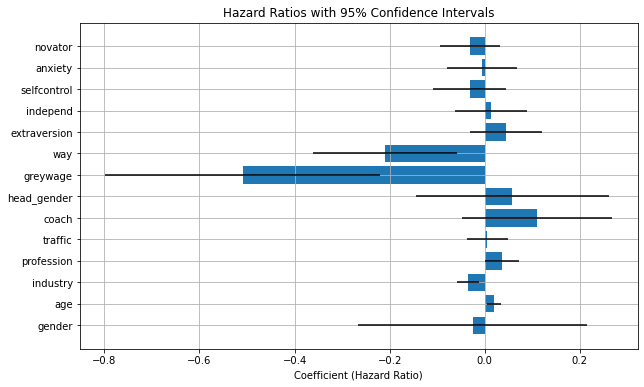

In [37]:
import matplotlib.pyplot as plt
import numpy as np
summary = coxph_model.summary
plt.figure(figsize=(10, 6))
plt.barh(summary.index, summary['coef'], xerr=summary['se(coef)']*1.96) # Multiplied by 1.96 for approximate 95% CI
plt.xlabel('Coefficient (Hazard Ratio)')
plt.title('Hazard Ratios with 95% Confidence Intervals')
plt.grid(True)
plt.show()



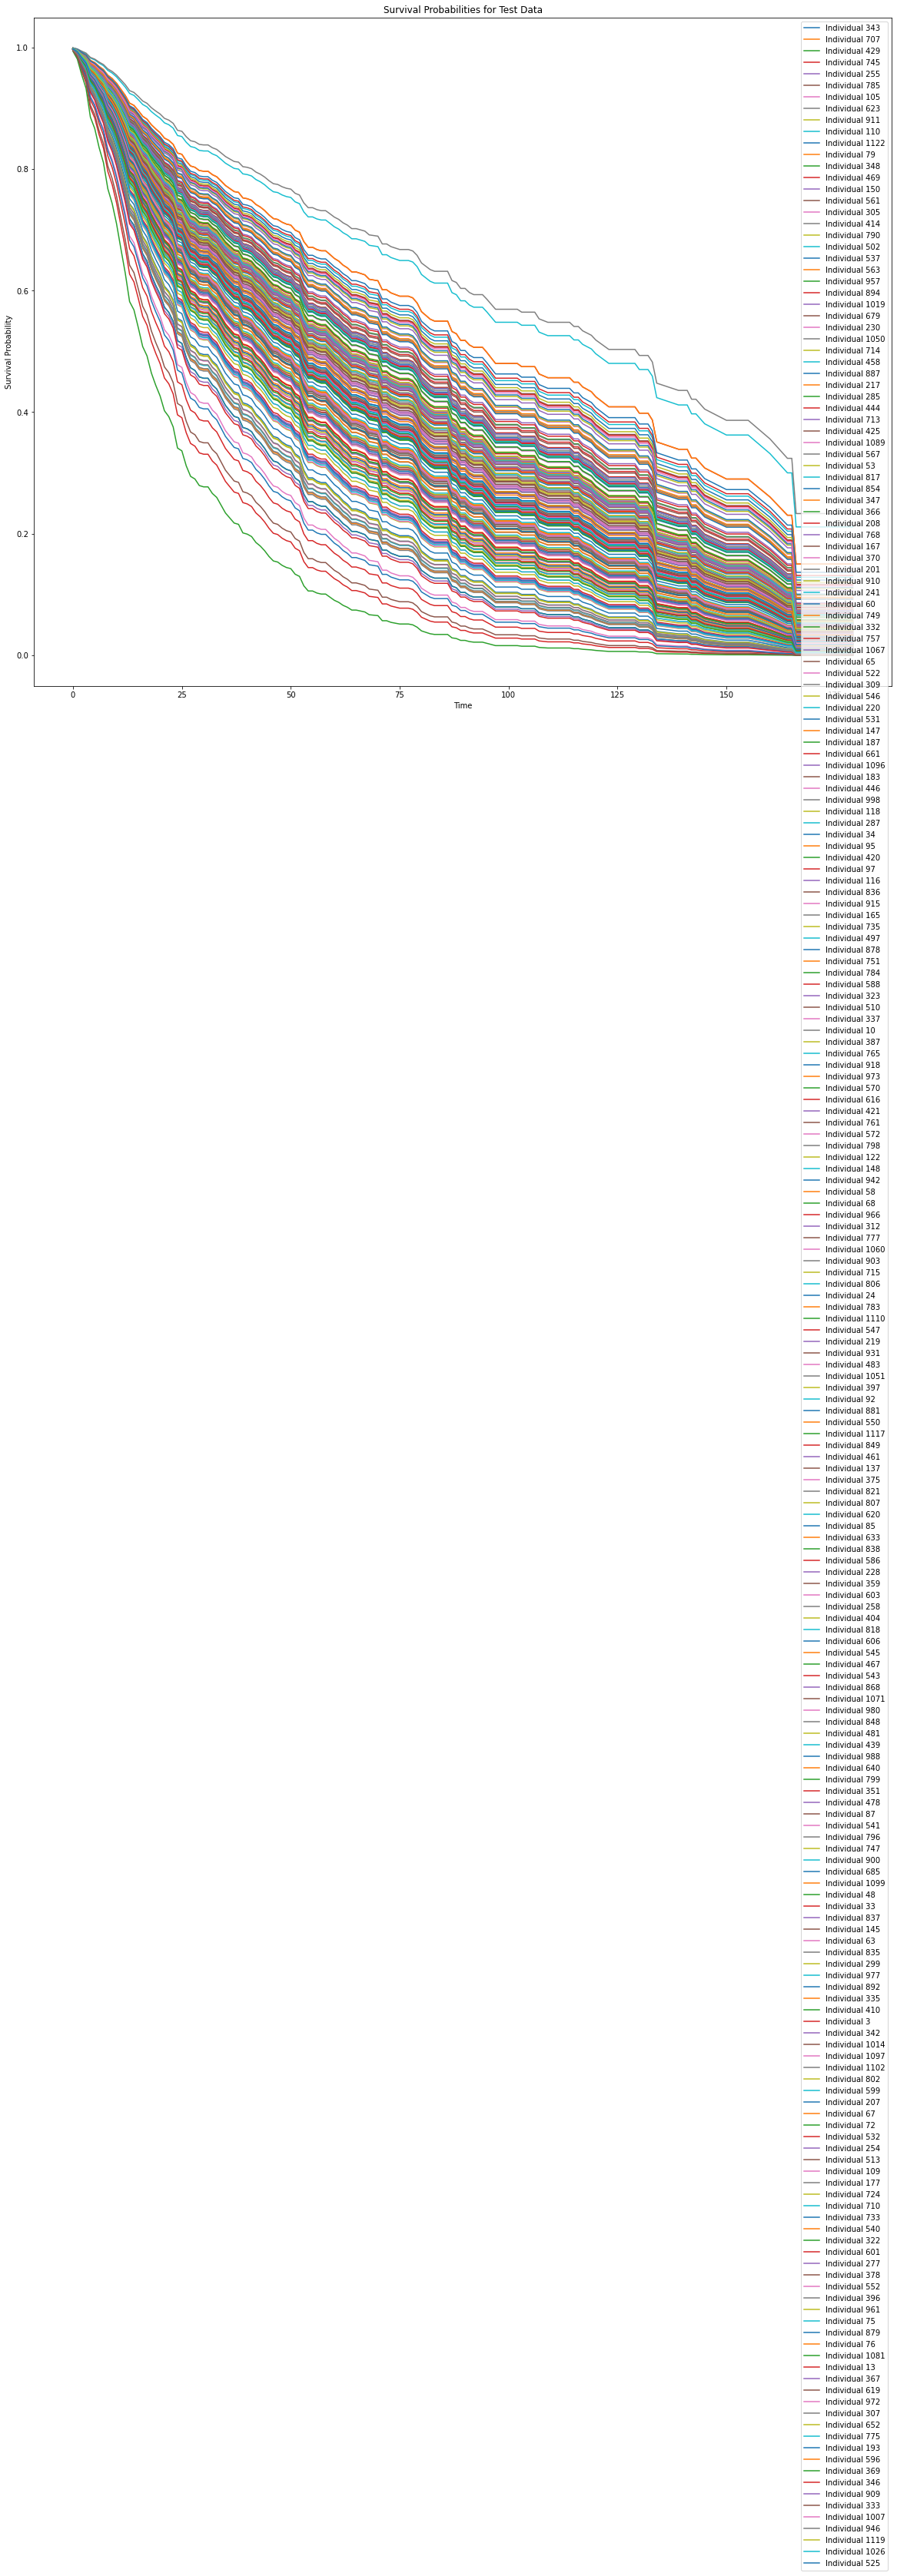

In [38]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(20, 16))  # Adjust width and height as needed

# Plot the survival function for each individual in the test data
for idx in survival_function.columns:
    plt.plot(survival_function.index, survival_function[idx], label=f"Individual {idx}")

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Probabilities for Test Data')
plt.legend()
plt.show()


### New; Cohort analysis


In [39]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [40]:
df2=pd.read_csv(r"C:\Users\Darshan\Downloads\turnover.csv",encoding='latin1')
df2.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,0,1,m,36.0,IT,IT,empjs,no,m,white,foot,3.8,7.6,2.6,7.9,4.4
1,0,1,f,24.0,IT,HR,youjs,yes,f,white,bus,8.6,4.1,4.9,3.3,6.0
2,0,0,f,29.0,Retail,HR,empjs,my head,f,grey,bus,4.6,5.5,1.8,7.1,6.7
3,0,0,f,29.0,Retail,HR,empjs,my head,f,grey,bus,4.6,1.0,5.7,8.7,2.9
4,0,0,f,29.0,Retail,HR,empjs,my head,f,grey,bus,5.4,4.8,8.0,9.4,2.9


In [41]:
unique_professions = df2['profession'].unique()
print("Unique values for profession:", unique_professions)

Unique values for profession: ['IT' 'HR' 'Sales' 'BusinessDevelopment' 'PR' 'Commercial' 'Marketing'
 'Consult' 'etc' 'Teaching' 'manage' 'Engineer' 'Finanñe' 'Law'
 'Accounting']


In [42]:
import pandas as pd
# Aggregate and cohort the data by profession
agg_df = df2.groupby('profession').agg(
    stag_count=('stag', 'count'),  # Count the number of records for each profession
    stag_yes=('event', 'sum'),     # Count the number of stag events (1) for each profession
    stag_no=('event', lambda x: (x == 0).sum()),  # Count the number of non-stag events (0) for each profession
)
# Calculate the percentage of stag events for each profession
agg_df['stag_percent'] = (agg_df['stag_yes'] / agg_df['stag_count']) * 100

# Reset index to make 'profession' a column instead of an index
agg_df.reset_index(inplace=True)

# Rename columns for clarity
agg_df.rename(columns={'profession': 'Profession'}, inplace=True)

# Display the aggregated DataFrame
agg_df


,Profession,stag_count,stag_yes,stag_no,stag_percent
0,Accounting,10,6,4,60.000000
1,BusinessDevelopment,27,16,11,59.259259
2,Commercial,23,15,8,65.217391
3,Consult,25,16,9,64.000000
4,Engineer,15,11,4,73.333333
5,Finanñe,17,12,5,70.588235
6,HR,757,357,400,47.159841
7,IT,74,25,49,33.783784
8,Law,7,5,2,71.428571
9,Marketing,31,21,10,67.741935


In [43]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'profession' column
agg_df['Profession'] = label_encoder.fit_transform(agg_df['Profession'])
# Display the encoded DataFrame
agg_df


,Profession,stag_count,stag_yes,stag_no,stag_percent
0,0,10,6,4,60.000000
1,1,27,16,11,59.259259
2,2,23,15,8,65.217391
3,3,25,16,9,64.000000
4,4,15,11,4,73.333333
5,5,17,12,5,70.588235
6,6,757,357,400,47.159841
7,7,74,25,49,33.783784
8,8,7,5,2,71.428571
9,9,31,21,10,67.741935


In [44]:
# Drop the specified columns
#agg_df = agg_df.drop(columns=['profession', 'profession_encoded'])
agg_df

,Profession,stag_count,stag_yes,stag_no,stag_percent
0,0,10,6,4,60.000000
1,1,27,16,11,59.259259
2,2,23,15,8,65.217391
3,3,25,16,9,64.000000
4,4,15,11,4,73.333333
5,5,17,12,5,70.588235
6,6,757,357,400,47.159841
7,7,74,25,49,33.783784
8,8,7,5,2,71.428571
9,9,31,21,10,67.741935


In [45]:
import pandas as pd
# Convert the 'stag' column to represent tenure in months
df2['tenure'] = df2['stag'].apply(lambda x: f"{x}th month" if x > 1 else f"{x}st month")
# Aggregate and cohort the data by profession
agg_df = df2.groupby('profession').agg(
    stag_count=('stag', 'count'),  # Count the number of records for each profession
    stag_yes=('event', 'sum'),     # Count the number of stag events (1) for each profession
    stag_no=('event', lambda x: (x == 0).sum()),  # Count the number of non-stag events (0) for each profession
)
# Calculate the percentage of stag events for each profession
agg_df['stag_percent'] = (agg_df['stag_yes'] / agg_df['stag_count']) * 100
# Reset index to make 'profession' a column instead of an index
agg_df.reset_index(inplace=True)
# Display the aggregated DataFrame
agg_df


,profession,stag_count,stag_yes,stag_no,stag_percent
0,Accounting,10,6,4,60.000000
1,BusinessDevelopment,27,16,11,59.259259
2,Commercial,23,15,8,65.217391
3,Consult,25,16,9,64.000000
4,Engineer,15,11,4,73.333333
5,Finanñe,17,12,5,70.588235
6,HR,757,357,400,47.159841
7,IT,74,25,49,33.783784
8,Law,7,5,2,71.428571
9,Marketing,31,21,10,67.741935


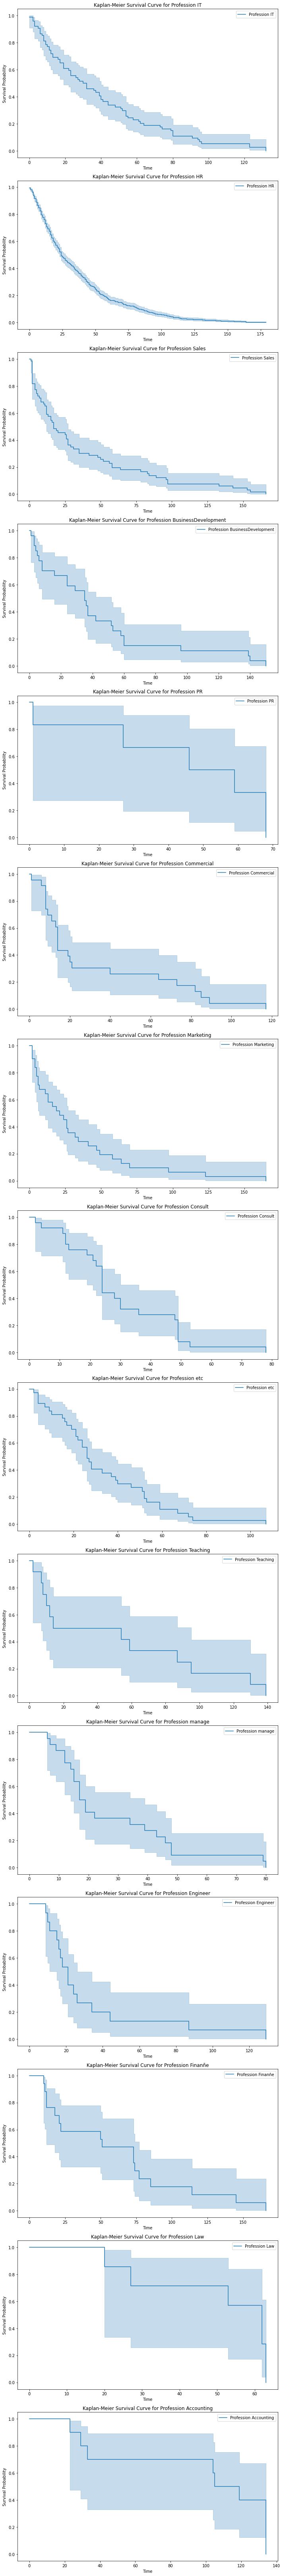

In [46]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Get unique professions
professions = df2['profession'].unique()

# Create subplots for each profession
fig, axes = plt.subplots(nrows=len(professions), ncols=1, figsize=(10, 6 * len(professions)))

# Iterate over each profession
for i, profession in enumerate(professions):
    # Filter DataFrame for the current profession
    profession_df = df2[df2['profession'] == profession]
    
    # Fit the Kaplan-Meier model for the current profession
    kmf.fit(profession_df['stag'], event_observed=None)  # No events observed
    
    # Plot the survival curve for the current profession
    kmf.plot(ax=axes[i], label=f"Profession {profession}")
    
    # Add labels and legend to the plot
    axes[i].set_title(f"Kaplan-Meier Survival Curve for Profession {profession}")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Survival Probability")
    axes[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [47]:
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Create a DataFrame to store survival probabilities for all professions
survival_prob_df = pd.DataFrame()

# Get unique professions
professions = df2['profession'].unique()

# Iterate over each profession
for profession in professions:
    # Filter DataFrame for the current profession
    profession_df = df2[df2['profession'] == profession]
    
    # Fit the Kaplan-Meier model for the current profession
    kmf.fit(profession_df['stag'], event_observed=None)  # No events observed
    
    # Get survival function for the current profession
    survival_function = kmf.survival_function_
    
    # Add survival function to the survival probabilities DataFrame
    survival_prob_df[f'Profession_{profession}'] = survival_function.iloc[:, 0]  # Extract survival probabilities for profession
    
# Display the survival probabilities for all professions
print("Survival Probabilities for All Professions:")
survival_prob_df

Survival Probabilities for All Professions:


,Profession_IT,Profession_HR,Profession_Sales,Profession_BusinessDevelopment,Profession_PR,Profession_Commercial,Profession_Marketing,Profession_Consult,Profession_etc,Profession_Teaching,Profession_manage,Profession_Engineer,Profession_Finanñe,Profession_Law,Profession_Accounting
timeline,,,,,,,,,,,,,,,
0.0,0.986486,0.994716,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2.0,0.959459,0.963012,0.818182,NaN,NaN,NaN,0.903226,0.96,0.972973,0.916667,NaN,NaN,NaN,NaN,NaN
3.0,0.918919,0.935271,NaN,0.888889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,0.905405,0.887715,0.742424,0.814815,NaN,NaN,0.774194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,0.864865,0.865258,0.727273,0.777778,NaN,0.913043,0.709677,NaN,NaN,NaN,0.954545,NaN,NaN,NaN,NaN
7.0,0.851351,0.848085,0.712121,NaN,NaN,NaN,0.677419,NaN,0.864865,0.833333,0.909091,NaN,NaN,NaN,NaN
8.0,0.810811,0.822985,0.681818,0.703704,NaN,0.739130,NaN,NaN,NaN,0.750000,NaN,NaN,NaN,NaN,NaN
9.0,0.783784,0.795244,NaN,NaN,NaN,0.695652,NaN,NaN,0.837838,NaN,0.863636,0.933333,NaN,NaN,NaN
10.0,0.770270,0.775429,0.666667,NaN,NaN,NaN,NaN,NaN,0.810811,0.666667,NaN,0.866667,0.941176,NaN,NaN


Survival probabilities for Profession IT: [0.98648649 0.95945946 0.95945946 0.91891892 0.91891892 0.91891892
 0.90540541 0.86486486 0.86486486 0.86486486 0.85135135 0.81081081
 0.81081081 0.81081081 0.78378378 0.78378378 0.77027027 0.74324324
 0.74324324 0.71621622 0.71621622 0.68918919 0.68918919 0.67567568
 0.64864865 0.64864865 0.60810811 0.60810811 0.60810811 0.59459459
 0.55405405 0.55405405 0.55405405 0.54054054 0.52702703 0.51351351
 0.5        0.45945946 0.45945946 0.45945946 0.44594595 0.43243243
 0.40540541 0.40540541 0.37837838 0.37837838 0.36486486 0.33783784
 0.33783784 0.32432432 0.31081081 0.2972973  0.25675676 0.25675676
 0.25675676 0.24324324 0.22972973 0.21621622 0.2027027  0.18918919
 0.17567568 0.16216216 0.14864865 0.10810811 0.10810811 0.10810811
 0.09459459 0.08108108 0.06756757 0.05405405 0.02702703 0.02702703
 0.         0.        ]
Survival probabilities for Profession HR: [0.99471598 0.99471598 0.99471598 0.99471598 0.98018494 0.98018494
 0.98018494 0.9801849

Survival probabilities for Profession PR: [0.83333333 0.66666667 0.5        0.33333333 0.         0.        ]
Survival probabilities for Profession Commercial: [0.95652174 0.91304348 0.73913043 0.73913043 0.73913043 0.73913043
 0.69565217 0.65217391 0.60869565 0.43478261 0.43478261 0.43478261
 0.43478261 0.39130435 0.34782609 0.30434783 0.26086957 0.2173913
 0.17391304 0.13043478 0.08695652 0.04347826 0.        ]
Survival probabilities for Profession Marketing: [0.90322581 0.90322581 0.90322581 0.83870968 0.83870968 0.77419355
 0.77419355 0.70967742 0.70967742 0.67741935 0.64516129 0.58064516
 0.58064516 0.5483871  0.51612903 0.48387097 0.4516129  0.38709677
 0.38709677 0.35483871 0.32258065 0.29032258 0.25806452 0.22580645
 0.19354839 0.16129032 0.12903226 0.09677419 0.06451613 0.03225806
 0.        ]
Survival probabilities for Profession Consult: [0.96 0.92 0.88 0.8  0.8  0.76 0.72 0.68 0.64 0.44 0.44 0.44 0.44 0.44
 0.4  0.32 0.32 0.28 0.24 0.08 0.08 0.08 0.08 0.04 0.  ]
Survival pr

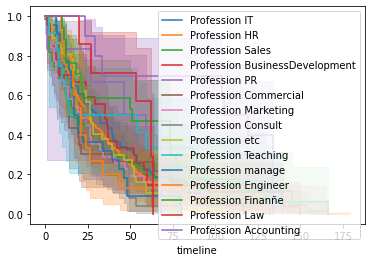

In [48]:
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Create subplots for each profession
fig, ax = plt.subplots()

# Iterate over each profession
for profession in df2['profession'].unique():
    # Filter DataFrame for the current profession
    profession_df = df2[df2['profession'] == profession]
    
    # Fit the Kaplan-Meier model for the current profession
    kmf.fit(profession_df['stag'], event_observed=None)  # No events observed
    
    # Plot the survival curve for the current profession
    kmf.plot(ax=ax, label=f"Profession {profession}")

    # Calculate the survival probability for each record in the current profession
    survival_probabilities = kmf.survival_function_at_times(profession_df['stag']).values
    print(f"Survival probabilities for Profession {profession}: {survival_probabilities}")



In [49]:
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Iterate over each profession
for profession in df2['profession'].unique():
    # Filter DataFrame for the current profession
    profession_df = df2[df2['profession'] == profession]
    
    # Fit the Kaplan-Meier model for the current profession
    kmf.fit(profession_df['stag'], event_observed=None)  # No events observed

    # Calculate the survival probability for each record in the current profession
    survival_probabilities = kmf.survival_function_at_times(profession_df['stag']).values.flatten()
    
    # Print survival probabilities for the current profession
    print(f"Survival probabilities for Profession {profession}:")
    for i, prob in enumerate(survival_probabilities):
        print(f"month {i + 1}: {prob}")

Survival probabilities for Profession IT:
month 1: 0.9864864864864858
month 2: 0.9594594594594591
month 3: 0.9594594594594591
month 4: 0.9189189189189187
month 5: 0.9189189189189187
month 6: 0.9189189189189187
month 7: 0.9054054054054047
month 8: 0.8648648648648641
month 9: 0.8648648648648641
month 10: 0.8648648648648641
month 11: 0.8513513513513509
month 12: 0.8108108108108102
month 13: 0.8108108108108102
month 14: 0.8108108108108102
month 15: 0.7837837837837832
month 16: 0.7837837837837832
month 17: 0.7702702702702701
month 18: 0.7432432432432431
month 19: 0.7432432432432431
month 20: 0.716216216216216
month 21: 0.716216216216216
month 22: 0.6891891891891888
month 23: 0.6891891891891888
month 24: 0.6756756756756753
month 25: 0.6486486486486485
month 26: 0.6486486486486485
month 27: 0.6081081081081078
month 28: 0.6081081081081078
month 29: 0.6081081081081078
month 30: 0.5945945945945943
month 31: 0.554054054054054
month 32: 0.554054054054054
month 33: 0.554054054054054
month 34: 0.540

Survival probabilities for Profession BusinessDevelopment:
month 1: 0.962962962962963
month 2: 0.888888888888889
month 3: 0.888888888888889
month 4: 0.8518518518518517
month 5: 0.814814814814815
month 6: 0.7777777777777778
month 7: 0.7037037037037035
month 8: 0.7037037037037035
month 9: 0.6666666666666665
month 10: 0.5925925925925926
month 11: 0.5925925925925926
month 12: 0.5555555555555556
month 13: 0.48148148148148145
month 14: 0.48148148148148145
month 15: 0.4444444444444444
month 16: 0.3703703703703704
month 17: 0.3703703703703704
month 18: 0.33333333333333337
month 19: 0.2962962962962962
month 20: 0.25925925925925924
month 21: 0.2222222222222222
month 22: 0.14814814814814814
month 23: 0.14814814814814814
month 24: 0.11111111111111115
month 25: 0.07407407407407407
month 26: 0.037037037037037035
month 27: 0.0
Survival probabilities for Profession PR:
month 1: 0.8333333333333333
month 2: 0.6666666666666666
month 3: 0.5000000000000001
month 4: 0.33333333333333337
month 5: 0.0
month 6:

In [50]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
import streamlit as st
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
@st.cache
def load_data(file_path):
    return pd.read_csv(file_path)

# Function to create Kaplan-Meier survival curve
def create_km_survival_curve(data, duration_col, event_col):
    kmf = KaplanMeierFitter()
    kmf.fit(data[duration_col], event_observed=data[event_col])
    plt.figure(figsize=(10, 6))
    kmf.plot()
    plt.title('Kaplan-Meier Survival Curve')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    st.pyplot()

# Main function for Streamlit app
def main():
    st.title('Predictive Modeling of Employee Retention Using Survival Analysis')

    # Add file upload option
    uploaded_file = st.file_uploader("Upload CSV file", type=['csv'])
    if uploaded_file is not None:
        df = load_data(uploaded_file)

        # Display some basic info about the data
        st.write("Data Info:")
        st.write(df.head())
        st.write("Data Shape:", df.shape)

        # Add option to display the Kaplan-Meier survival curve
        st.subheader("Kaplan-Meier Survival Curve")
        st.write("Select the columns for duration and event:")
        duration_col = st.selectbox("Select Duration Column", df.columns)
        event_col = st.selectbox("Select Event Column", df.columns)
        if st.button("Generate Kaplan-Meier Survival Curve"):
            create_km_survival_curve(df, duration_col, event_col)

# Run the app
if __name__ == '__main__':
    main()


2024-03-15 10:23:05.965 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [52]:
streamlit run employee_retention_app.py



SyntaxError: invalid syntax (983449175.py, line 1)

In [53]:
import streamlit as st
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
@st.cache
def load_data(file_path):
    return pd.read_csv(file_path)

# Function to create Kaplan-Meier survival curve
def create_km_survival_curve(data, duration_col, event_col):
    kmf = KaplanMeierFitter()
    kmf.fit(data[duration_col], event_observed=data[event_col])
    plt.figure(figsize=(10, 6))
    kmf.plot()
    plt.title('Kaplan-Meier Survival Curve')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    st.pyplot()

# Main function for Streamlit app
def main():
    st.title('Predictive Modeling of Employee Retention Using Survival Analysis')

    # Add file upload option
    uploaded_file = st.file_uploader("Upload CSV file", type=['csv'])
    if uploaded_file is not None:
        df = load_data(uploaded_file)

        # Display some basic info about the data
        st.write("Data Info:")
        st.write(df.head())
        st.write("Data Shape:", df.shape)

        # Add option to display the Kaplan-Meier survival curve
        st.subheader("Kaplan-Meier Survival Curve")
        st.write("Select the columns for duration and event:")
        duration_col = st.selectbox("Select Duration Column", df.columns)
        event_col = st.selectbox("Select Event Column", df.columns)
        if st.button("Generate Kaplan-Meier Survival Curve"):
            create_km_survival_curve(df, duration_col, event_col)

# Run the app
if __name__ == '__main__':
    main()
